In [49]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = [12.0, 8.0]
%matplotlib inline

In [29]:
# Keras is an easy to use Deep Learning library for Python
import keras

from keras import backend as K


# Load Sequential model architecture
from keras.models import Sequential

# Load Dense and Dropout layers ?
from keras.layers import Dense, Dropout

# Load RMSprop optimizer to minimize cost to train the network
from keras.optimizers import RMSprop

# Tutorial

In [30]:
# Generate some data
X_n = np.linspace(0, 1, 1000)
y = 0.5 * X_n + np.random.random(1000) * 0.01

### Split data to train and test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2)

### Model

In [32]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))
model.add(Dense(1, activation='linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

### Train a model

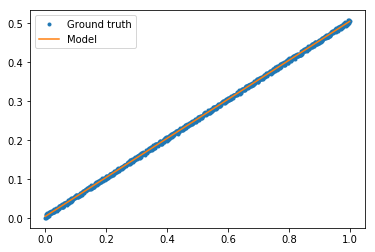

In [41]:
for i in range(0, 1):
    history = model.fit(x_train, y_train,
                        batch_size=8, #batch_size,
                        epochs=1,
                        verbose=0)
    
    #pylab.figure()
    pylab.clf()
    xs = np.linspace(X_n.min(), X_n.max(), 100)
    
    pylab.plot(X_n, y, '.')
    pylab.plot(xs, model.predict(xs))
    pylab.legend(['Ground truth', 'Model'])

# Exercise

## Loading data

In [50]:
# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

## Visualising data

(0, 10, -60, 60)

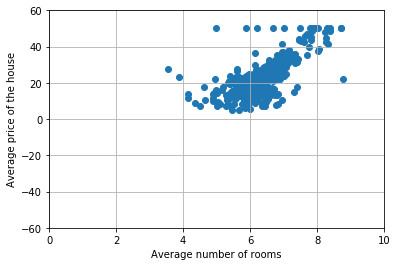

In [60]:
pylab.scatter(X, y)
pylab.grid()
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.axis((0,10,-60,60))

## Data preprocessing

In [268]:
max_value = X.max()
min_value = X.min()
print(min_value, max_value)

3.561 8.78


In [269]:
# Normalize
X_n = X #X / max_value # Max becomes 1 (and min stays above 0)

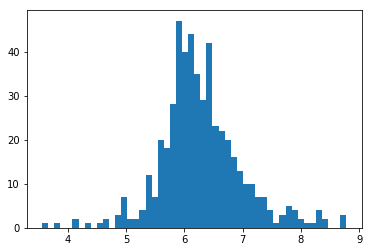

In [270]:
pylab.figure()
_ = pylab.hist(X_n, 50)

## Define model

In [282]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))
model.add(Dense(1, activation='linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [283]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

## Train the model

### Split data into training and testing sets

In [285]:
x_train, x_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2)

### Train the model

In [286]:
batch_size = x_train.shape[0]

In [287]:
history = model.fit(x_train, y_train,
                    batch_size=64, #batch_size,
                    epochs=1,
                    verbose=1)

Epoch 1/1
404/404 [==============================] - 0s 426us/step - loss: 784.1426


In [288]:
xs = np.linspace(X_n.min(), X_n.max(),100)

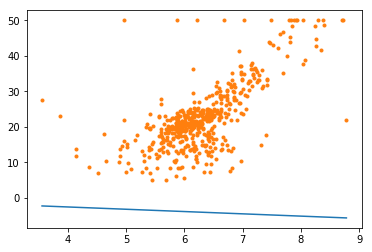

In [289]:
pylab.figure()
pylab.plot(xs, model.predict(xs))
pylab.plot(X_n, y, '.')

In [290]:
## Lets repeat training and print the model

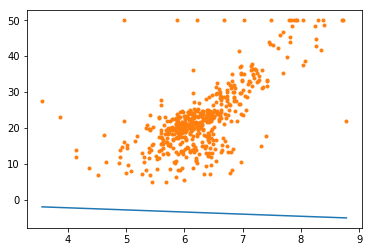

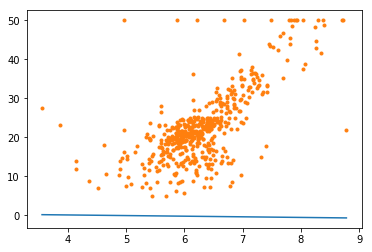

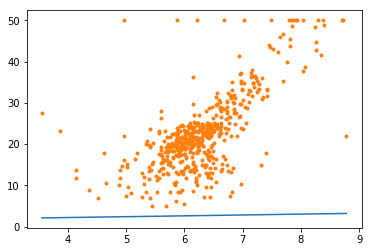

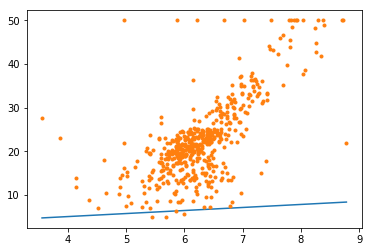

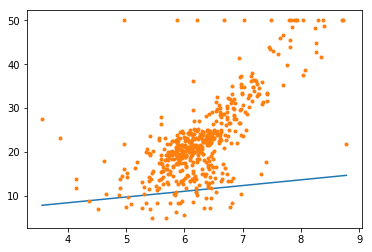

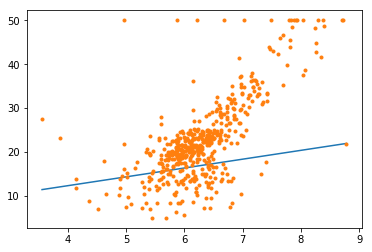

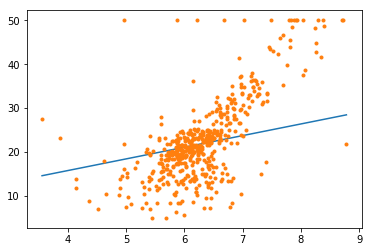

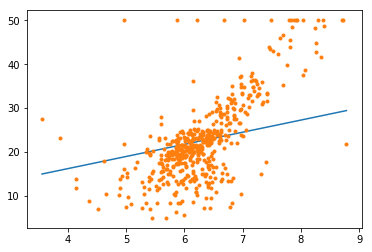

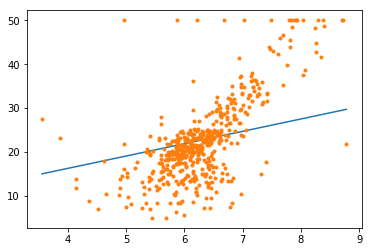

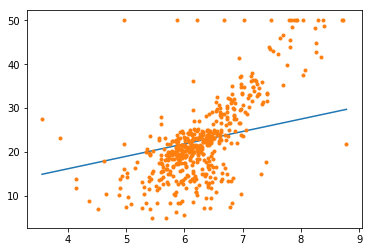

In [291]:
import time
for i in range(0, 100):
    history = model.fit(x_train, y_train,
                        batch_size=16, #batch_size,
                        epochs=epochs,
                        verbose=0)
    if i % 10 == 0:
        pylab.figure()
        pylab.plot(xs, model.predict(xs))
        pylab.plot(X_n, y, '.')